In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the datset into python
df = pd.read_excel(r"C:\Users\ia\Desktop\Travail\Josh Kachi\3\SMEs in Lagos.xlsx")

In [3]:
# View the first five variables
df.head()

,S/N,Company Name,Year Established,Number of Workers,Location,Website,Project,Project Management Framework,Estimated Cost (USD),Year of Completion,Scheduled Plan,Location.1,Quality,Source
0,1,OneFi,2012,151,Lagos,www.onefi.com,Digital Lending Platform,Agile,5000000,2020,6 months,Lagos,High,OneFi. (2020). OneFi Raises $5 Million in Seri...
1,2,Paystack,2015,149,Lagos,www.paystack.com,Payment Gateway,Scrum,8000000,2020,3 months,Lagos,Medium,Paystack. (2020). Paystack Raises $8 Million i...
2,3,Cowrywise,2017,34,Lagos,www.cowrywise.com,Micro-Investing Application,Kanban,3000000,2020,2 months,Lagos,High,Cowrywise. (2020). Cowrywise Raises $3 Million...
3,4,PiggyVest,2016,76,Lagos,www.piggyvest.com,Savings and Investment Application,Waterfall,1000000,2020,4 months,Lagos,High,PiggyVest. (2020). PiggyVest Raises $1 Million...
4,5,Kudi,2016,36,Lagos,www.kudi.ai,Chatbot-based Banking,Agile,500000,2020,3 months,Lagos,High,"Kudi. (2020). Kudi Raises $500,000 in Seed Fun..."


In [6]:
# Basic data exploration
print(df.describe())
print(df['Project Management Framework'].value_counts())

            S/N  Year Established  Number of Workers  Estimated Cost (USD)  \
count  10.00000          10.00000          10.000000          1.000000e+01   
mean    5.50000        2015.90000          73.700000          8.860000e+06   
std     3.02765           1.66333          55.880925          1.098112e+07   
min     1.00000        2012.00000          15.000000          1.000000e+05   
25%     3.25000        2015.25000          34.500000          1.500000e+06   
50%     5.50000        2016.00000          55.500000          5.000000e+06   
75%     7.75000        2017.00000         130.000000          1.025000e+07   
max    10.00000        2018.00000         151.000000          3.500000e+07   

       Year of Completion  
count                10.0  
mean               2020.0  
std                   0.0  
min                2020.0  
25%                2020.0  
50%                2020.0  
75%                2020.0  
max                2020.0  
Project Management Framework
Agile        3
S

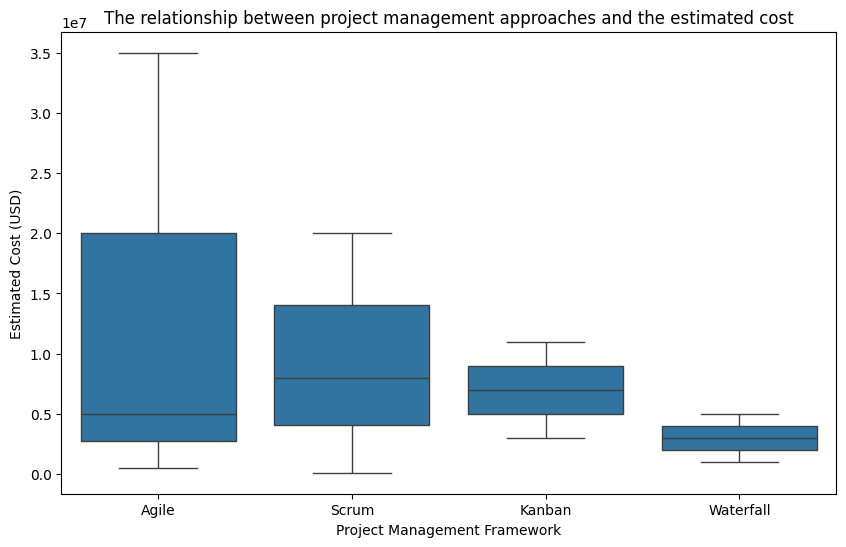

In [10]:
# Analyze relationship between project management and estimated cost
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project Management Framework', y='Estimated Cost (USD)', data=df)
plt.title('The relationship between project management approaches and the estimated cost')
plt.show()

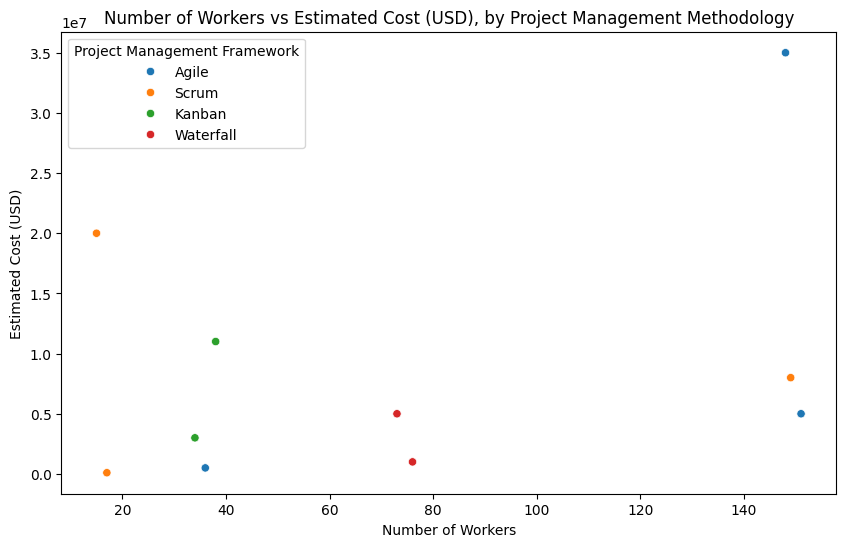

In [11]:
# Analyze relationship between number of workers and project management
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of Workers', y='Estimated Cost (USD)', hue='Project Management Framework', data=df)
plt.title('Number of Workers vs Estimated Cost (USD), by Project Management Methodology')
plt.show()

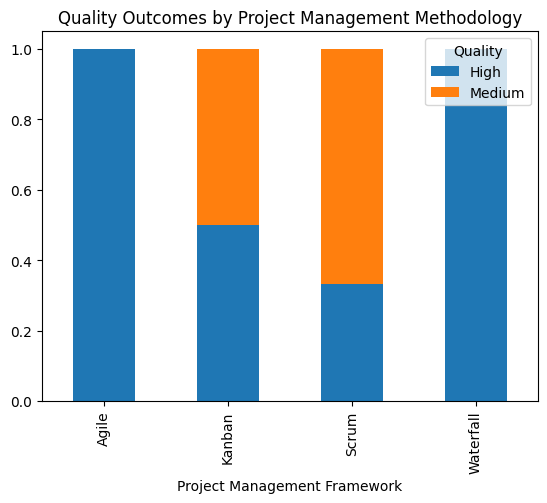

<Figure size 1200x1000 with 0 Axes>

In [17]:
# Analyze quality outcomes by project management methodology
quality_by_pm = df.groupby('Project Management Framework')['Quality'].value_counts(normalize=True).unstack()
quality_by_pm.plot(kind='bar', stacked=True)
plt.title('Quality Outcomes by Project Management Methodology')
plt.figure(figsize=(12, 10))
plt.show()

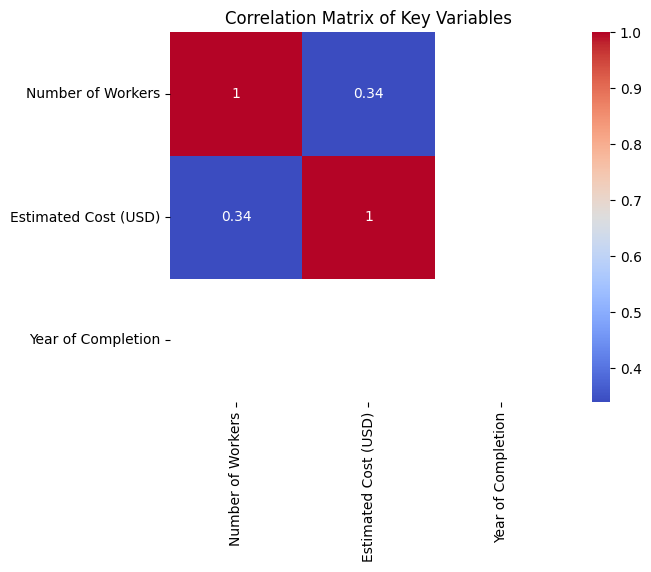

In [18]:

# Correlation analysis
correlation_matrix = df[['Number of Workers', 'Estimated Cost (USD)', 'Year of Completion']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

In [22]:
# Manually create the dataframe from the image data
data = {
    'Company Name': ['OneFi', 'Paystack', 'Cowrywise', 'PiggyVest', 'Kudi', 'Wallets Africa', 'TeamApt', 'Flutterwave', 'FairMoney', 'Migo'],
    'Year Established': [2012, 2015, 2017, 2016, 2016, 2018, 2015, 2016, 2017, 2017],
    'Number of Workers': [151, 149, 34, 76, 36, 17, 73, 148, 38, 15],
    'Project': ['Digital Lending Platform', 'Payment Gateway', 'Micro-Investing App', 'Savings and Investment App', 'Chatbot-based Banking', 'Digital Wallet', 'Digital Banking Platform', 'Payment Gateway', 'Digital Lending Platform', 'Digital Lending Platform'],
    'Project Management Framework': ['Agile', 'Scrum', 'Kanban', 'Waterfall', 'Agile', 'Scrum', 'Waterfall', 'Agile', 'Kanban', 'Scrum'],
    'Estimated Cost': [5000000, 8000000, 3000000, 10000000, 500000, 100000, 50000000, 35000000, 11000000, 20000000],
    'Year of Completion': [2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
    'Scheduled(months)': ['6', '3', '2', '4', '3', '2', '6', '3', '2', '3'],
    'Quality': ['High', 'Medium', 'High', 'High', 'High', 'Medium', 'High', 'High', 'Medium', 'High']
}

df2 = pd.DataFrame(data)


In [24]:
# Convert 'Scheduled' to numeric (months)
df2['Scheduled(months)'] = df2['Scheduled(months)'].str.extract('(\d+)').astype(int)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ia\AppData\Local\Temp\ipykernel_16840\596043557.py:2: SyntaxWarning: invalid escape sequence '\d'
  df2['Scheduled(months)'] = df2['Scheduled(months)'].str.extract('(\d+)').astype(int)


Objective 1: Evaluate the effectiveness of different project management methodologies

In [25]:
# Count of projects by methodology
pm_counts = df2['Project Management Framework'].value_counts()


In [28]:
# Average cost, schedule, and quality score by methodology
pm_effectiveness = df2.groupby('Project Management Framework').agg({
    'Estimated Cost': 'mean',
    'Scheduled(months)': 'mean',
    'Quality': lambda x: (x == 'High').mean()  # Percentage of high-quality projects
    })

In [30]:
# View the Effectivesness
print(pm_effectiveness)

                              Estimated Cost  Scheduled(months)   Quality
Project Management Framework                                             
Agile                           1.350000e+07           4.000000  1.000000
Kanban                          7.000000e+06           2.000000  0.500000
Scrum                           9.366667e+06           2.666667  0.333333
Waterfall                       3.000000e+07           5.000000  1.000000


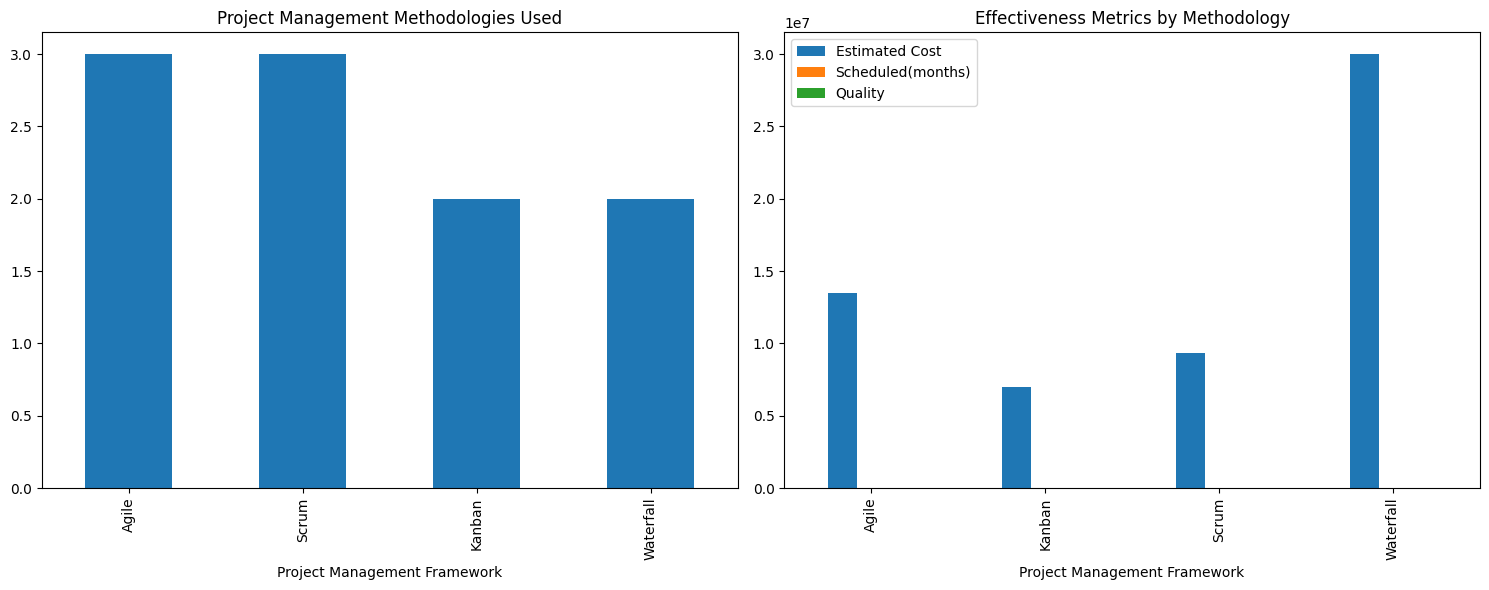

In [31]:
# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
pm_counts.plot(kind='bar', ax=ax1, title='Project Management Methodologies Used')
pm_effectiveness.plot(kind='bar', ax=ax2, title='Effectiveness Metrics by Methodology')
plt.tight_layout()
plt.show()

Objective 2: Analyze the relationship between project management approaches and project outcomes

In [32]:
# Correlation analysis
correlation = df2[['Estimated Cost', 'Scheduled(months)']].corr()
print("Correlation between Cost and Schedule:", correlation.iloc[0, 1])

Correlation between Cost and Schedule: 0.46833227091127955


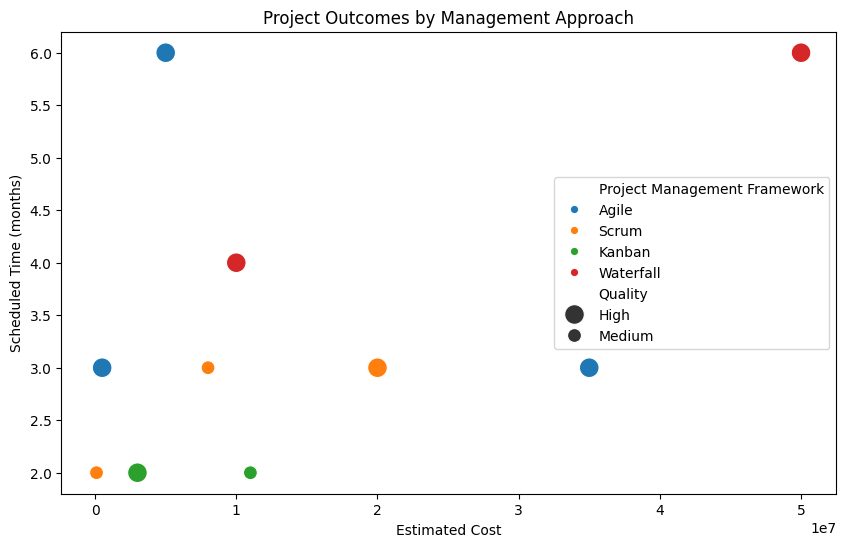

In [34]:
# Scatter plot of cost vs. schedule, colored by methodology
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Estimated Cost', y='Scheduled(months)', hue='Project Management Framework', size='Quality', sizes={'High': 200, 'Medium': 100})
plt.title('Project Outcomes by Management Approach')
plt.xlabel('Estimated Cost')
plt.ylabel('Scheduled Time (months)')
plt.show()

Objective 3: Assess the impact of company size on project management choices and success rates


In [40]:
# Categorize company size
df2['Size Category'] = pd.cut(df['Number of Workers'], bins=[0, 50, 100, float('inf')], labels=['Small', 'Medium', 'Large'])


In [41]:
# Success rate (assuming 'High' quality is success)
success_rate = df2.groupby('Size Category')['Quality'].apply(lambda x: (x == 'High').mean())
print("Success Rate by Company Size:")
print(success_rate)

Success Rate by Company Size:
Size Category
Small     0.600000
Medium    1.000000
Large     0.666667
Name: Quality, dtype: float64


C:\Users\ia\AppData\Local\Temp\ipykernel_16840\792260702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate = df2.groupby('Size Category')['Quality'].apply(lambda x: (x == 'High').mean())


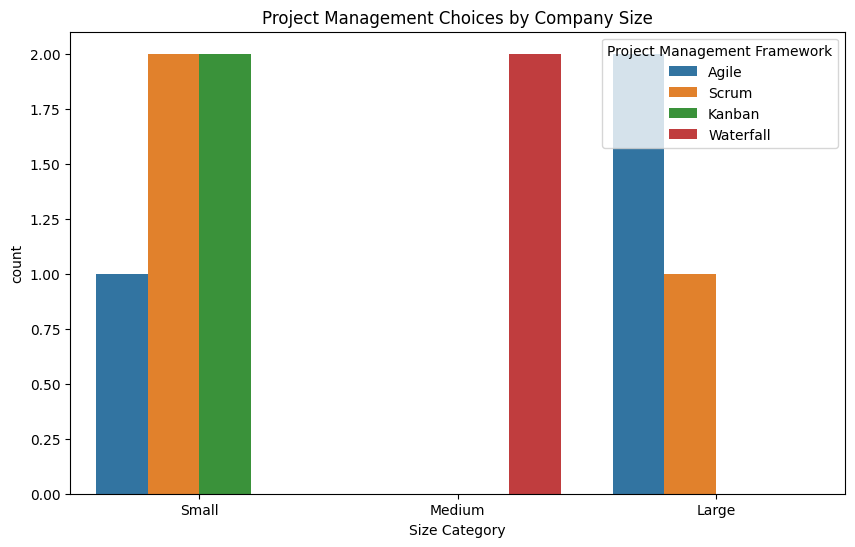

In [43]:
# Visualize project management choices by company size
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Size Category', hue='Project Management Framework')
plt.title('Project Management Choices by Company Size')
plt.show()


Objective 4: Investigate the correlation between project type and chosen project management methodology

In [44]:
# Create a contingency table
contingency = pd.crosstab(df['Project'], df['Project Management Framework'])

In [45]:
# Chi-square test for independence
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-square statistic: 18.88888888888889
p-value: 0.3986955042750898


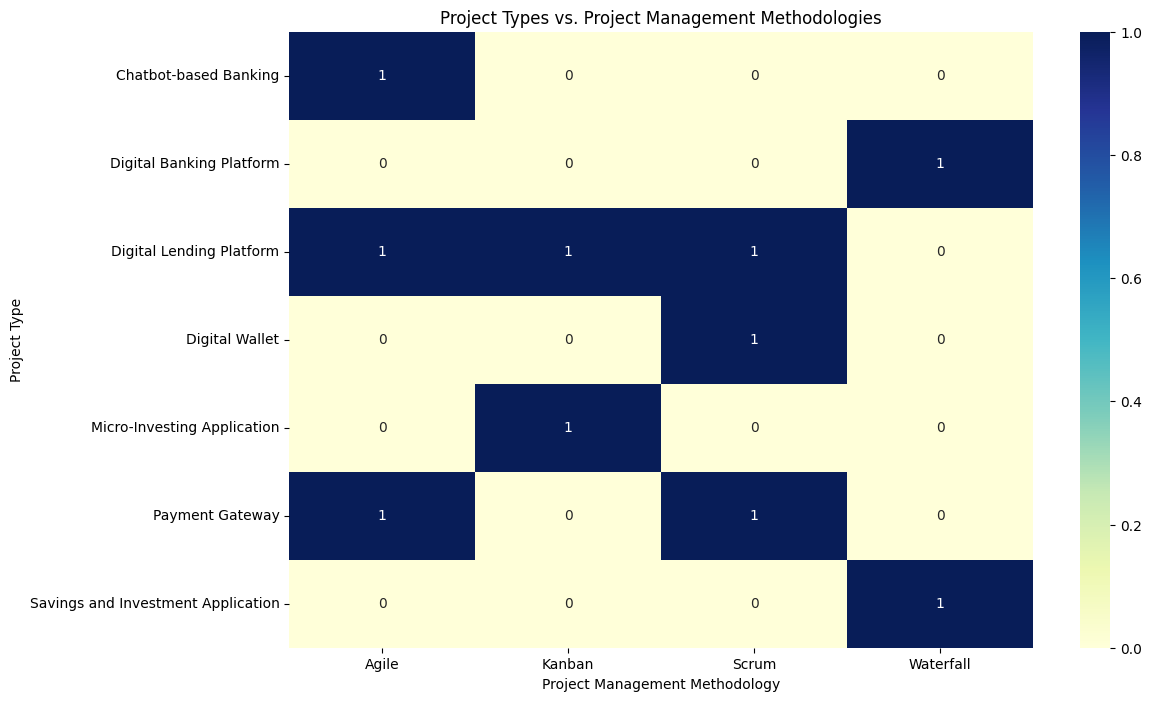

In [46]:
# Visualize
plt.figure(figsize=(12, 8))
sns.heatmap(contingency, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Project Types vs. Project Management Methodologies')
plt.ylabel('Project Type')
plt.xlabel('Project Management Methodology')
plt.show()